# Improving Employee Retention by Predicting Employee Attrition

## EDA

### Descriptive Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import make_scorer, accuracy_score, recall_score, roc_auc_score, precision_score, f1_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, cross_validate, RandomizedSearchCV
from IPython.display import clear_output
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, cross_val_score
from scipy.stats import randint

%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_excel('/content/drive/MyDrive/Rakamin/Project Data Science/Improving Employee Retention by Predicting Employee Attrition/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [3]:
df.shape

(287, 25)

In [4]:
lst_item = []
for col in df.columns:
    dtypes = df[col].dtype
    n_null =  df[col].isnull().sum()
    percent_null = round(100*df[col].isnull().sum()/len(df[col]),2)
    n_unique = df[col].nunique()
    unique = df[col].unique()[:5]
    lst_item.append([col,dtypes, n_null,percent_null,n_unique,unique] )
df_desc = pd.DataFrame(data=lst_item, columns=['Feature', 'dtypes', 'n_null', 'percent_null', 'n_unique', 'unique'])
df_desc

,Feature,dtypes,n_null,percent_null,n_unique,unique
0,Username,object,0,0.00,285,"[spiritedPorpoise3, jealousGelding2, pluckyMue..."
1,EnterpriseID,int64,0,0.00,287,"[111065, 106080, 106452, 106325, 111171]"
2,StatusPernikahan,object,0,0.00,5,"[Belum_menikah, Menikah, Bercerai, Lainnya, -]"
3,JenisKelamin,object,0,0.00,2,"[Pria, Wanita]"
4,StatusKepegawaian,object,0,0.00,3,"[Outsource, FullTime, Internship]"
5,Pekerjaan,object,0,0.00,14,"[Software Engineer (Back End), Data Analyst, S..."
6,JenjangKarir,object,0,0.00,3,"[Freshgraduate_program, Senior_level, Mid_level]"
7,PerformancePegawai,object,0,0.00,5,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
8,AsalDaerah,object,0,0.00,5,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
9,HiringPlatform,object,0,0.00,9,"[Employee_Referral, Website, Indeed, LinkedIn,..."


In [5]:
df.duplicated().sum()

0

In [6]:
nums = df.select_dtypes(include=['float', 'int']).columns.tolist()
cats = df.select_dtypes(exclude=['float', 'int']).columns.tolist()

In [7]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
IkutProgramLOP,29.0,0.517241,0.508548,0.0,0.0,1.0,1.0,1.0


In [8]:
df[cats].describe().T

,count,unique,top,freq
Username,287,285,boredEggs0,2
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
NomorHP,287,287,+6282232522xxx,1


1. No duplicated data.
2. Columns that have missing values:
- SkorKepuasanPegawai	: 5
- JumlahKeikutsertaanProjek	: 3
- JumlahKeterlambatanSebulanTerakhir : 1
- JumlahKetidakhadiran	:	6
- IkutProgramLOP	:	258
- AlasanResign	:	66

### Univariate Analysis

In [9]:
def plotting(plot):
  plt.figure(figsize=(15,6))
  for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    if plot == 'box':
      sns.boxplot(y=nums[i], data=df, showfliers=True, color='skyblue')
    elif plot == 'dist':
      sns.distplot(x=df[nums[i]], color='skyblue')
    elif plot == 'violin':
      sns.violinplot(y=nums[i], data=df, color='skyblue')
    else:
      None
    plt.tight_layout()

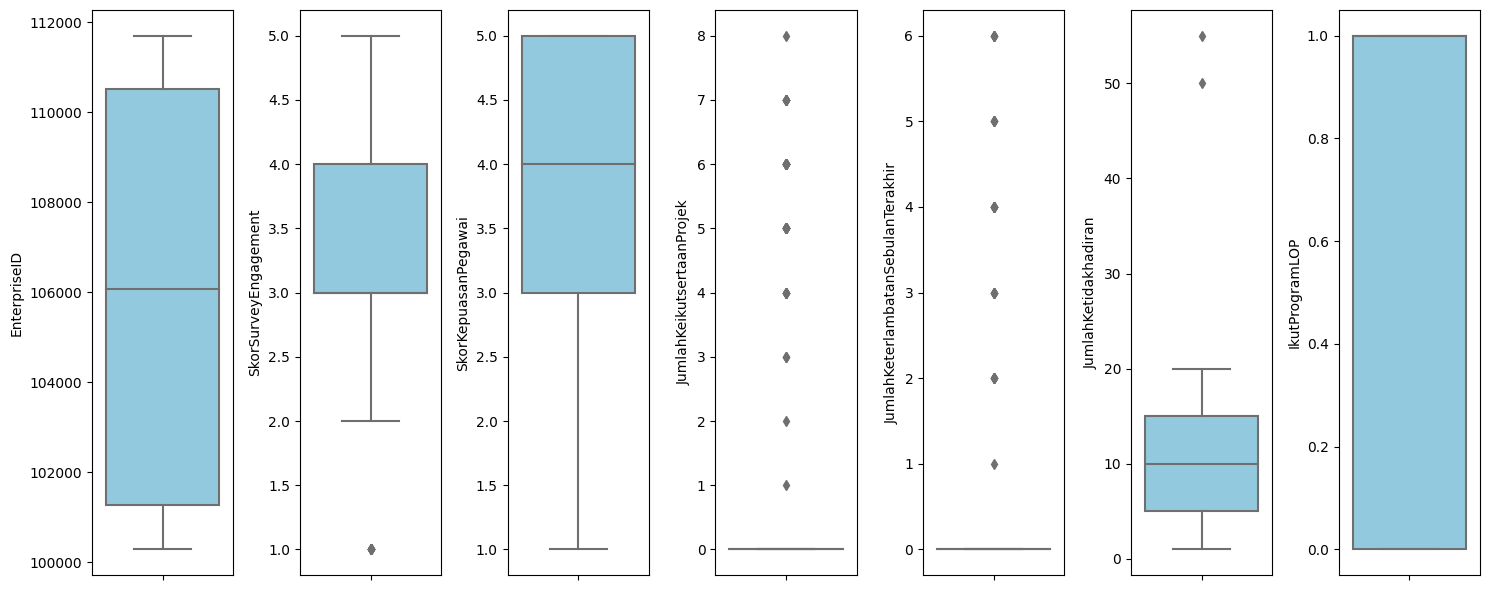

In [10]:
plotting('box')

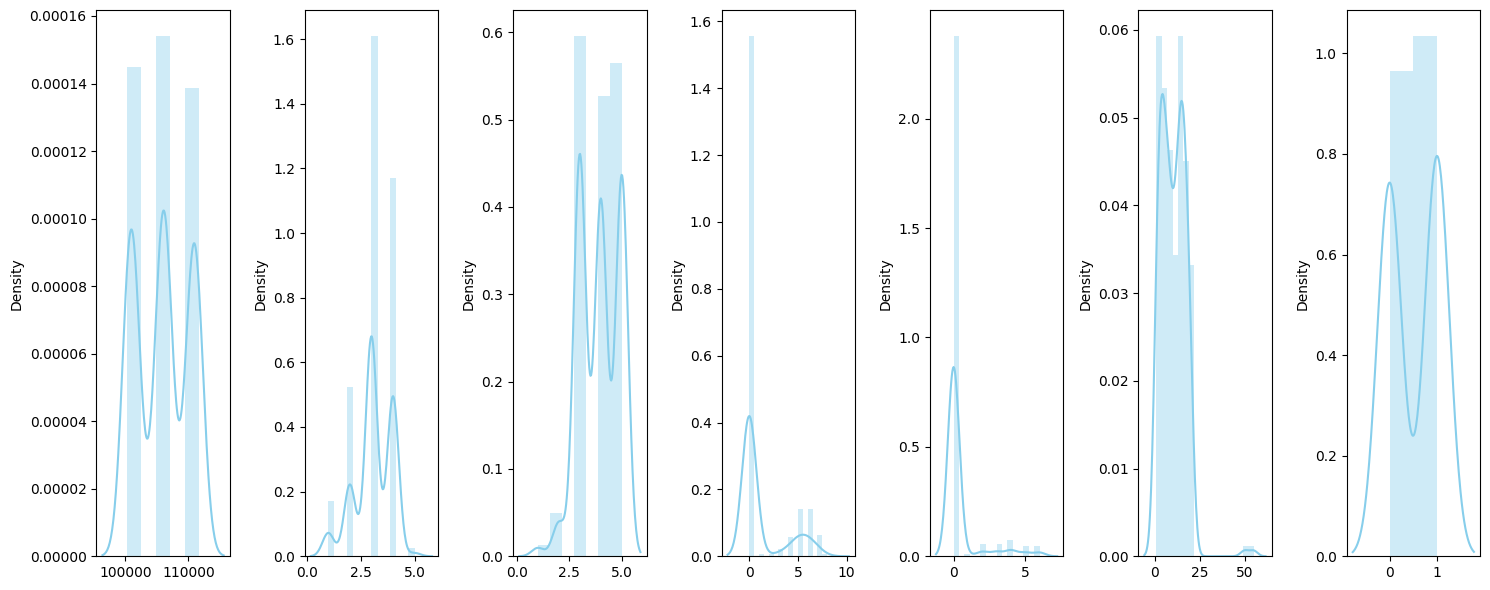

In [11]:
plotting('dist')

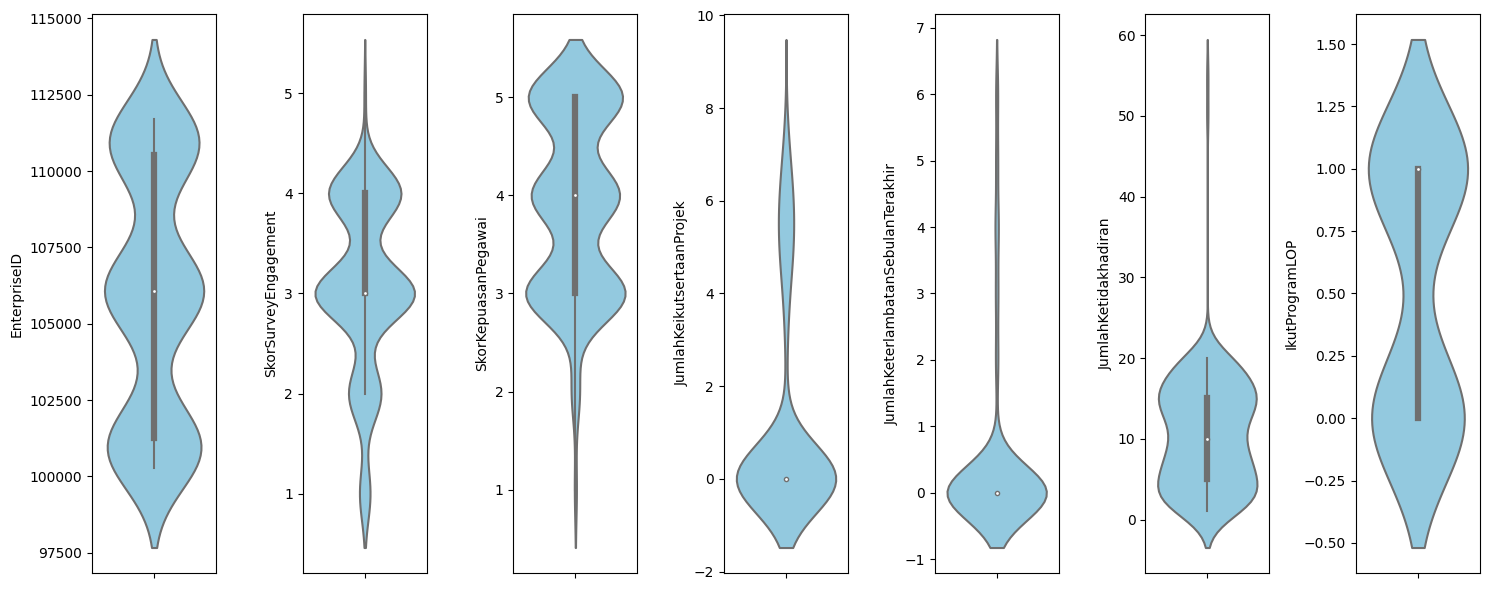

In [12]:
plotting('violin')

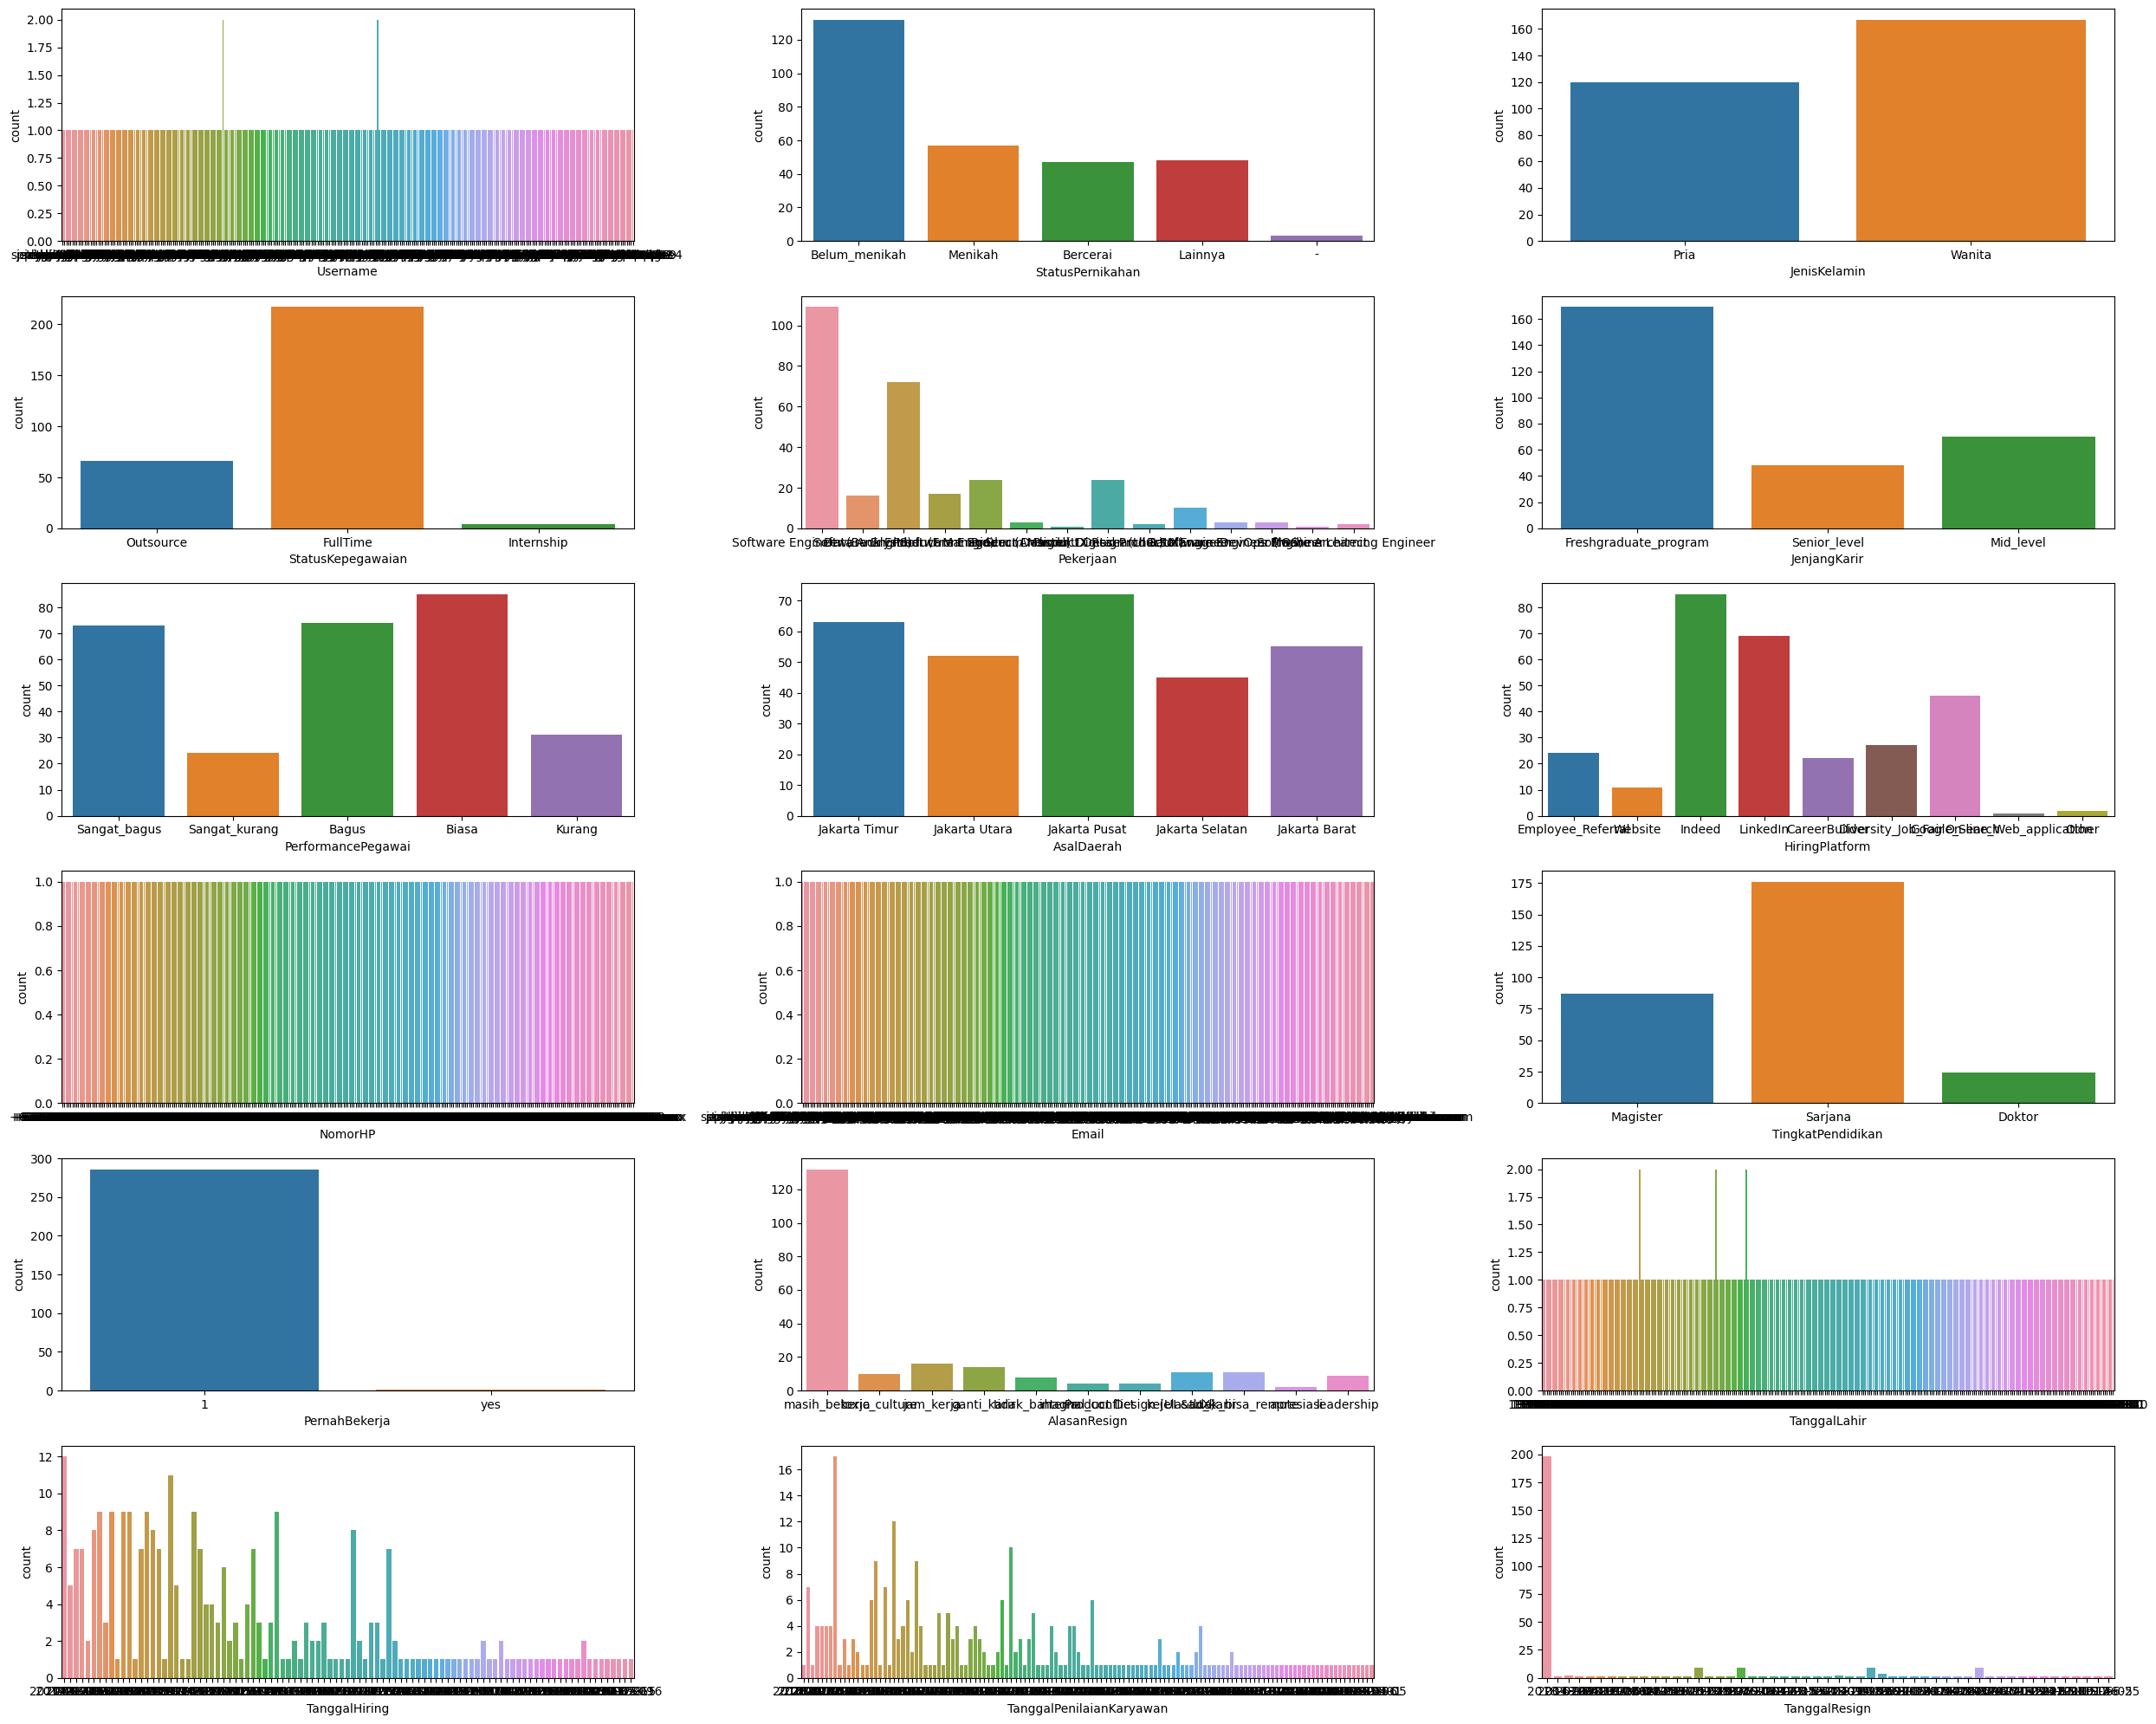

In [13]:
import math
plt.figure(figsize=(25, 20))
num_plots = len(cats)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=df[cats[i]])

plt.tight_layout()
plt.show()

### Multivariate Analysis

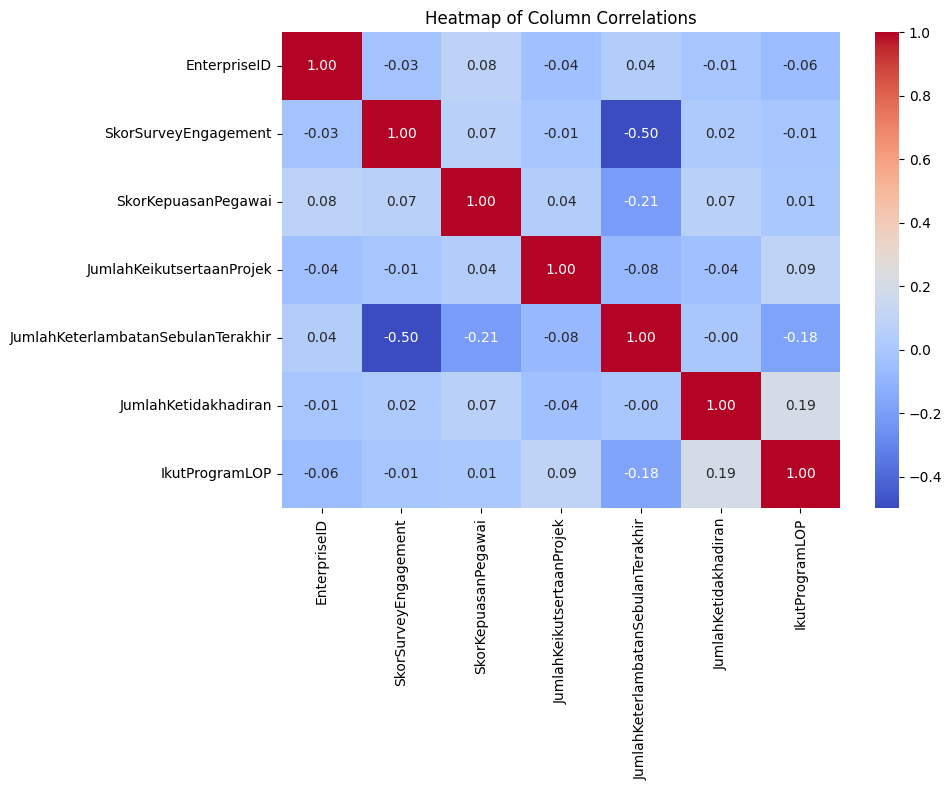

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap of Column Correlations')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [15]:
# Replace Values
df = df.replace('-',np.nan)
df['PernahBekerja']=df['PernahBekerja'].replace('yes',1)

In [16]:
lst_item = []
for col in df.columns:
    dtypes = df[col].dtype
    n_null =  df[col].isnull().sum()
    percent_null = round(100*df[col].isnull().sum()/len(df[col]),2)
    n_unique = df[col].nunique()
    unique = df[col].unique()[:5]
    lst_item.append([col,dtypes, n_null,percent_null,n_unique,unique] )
df_desc = pd.DataFrame(data=lst_item, columns=['Feature', 'dtypes', 'n_null', 'percent_null', 'n_unique', 'unique'])
df_desc

,Feature,dtypes,n_null,percent_null,n_unique,unique
0,Username,object,0,0.00,285,"[spiritedPorpoise3, jealousGelding2, pluckyMue..."
1,EnterpriseID,int64,0,0.00,287,"[111065, 106080, 106452, 106325, 111171]"
2,StatusPernikahan,object,3,1.05,4,"[Belum_menikah, Menikah, Bercerai, Lainnya, nan]"
3,JenisKelamin,object,0,0.00,2,"[Pria, Wanita]"
4,StatusKepegawaian,object,0,0.00,3,"[Outsource, FullTime, Internship]"
5,Pekerjaan,object,0,0.00,14,"[Software Engineer (Back End), Data Analyst, S..."
6,JenjangKarir,object,0,0.00,3,"[Freshgraduate_program, Senior_level, Mid_level]"
7,PerformancePegawai,object,0,0.00,5,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
8,AsalDaerah,object,0,0.00,5,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
9,HiringPlatform,object,0,0.00,9,"[Employee_Referral, Website, Indeed, LinkedIn,..."


In [17]:
# Handling Missing Value
df['StatusPernikahan'].fillna(df['StatusPernikahan'].mode()[0], inplace=True)
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(), inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(), inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median(), inplace=True)
df['IkutProgramLOP'].fillna(0.0, inplace=True)
df['AlasanResign'].fillna(df['AlasanResign'].mode()[0], inplace=True)
df['TanggalResign'] = pd.to_datetime(df['TanggalResign']).fillna(datetime.today())

In [18]:
# Change Data Type
df['SkorKepuasanPegawai']=df['SkorKepuasanPegawai'].astype('int64')
df['JumlahKeikutsertaanProjek']=df['JumlahKeikutsertaanProjek'].astype('int64')
df['JumlahKeterlambatanSebulanTerakhir']=df['JumlahKeterlambatanSebulanTerakhir'].astype('int64')
df['JumlahKetidakhadiran']=df['JumlahKetidakhadiran'].astype('int64')
df['IkutProgramLOP']=df['IkutProgramLOP'].astype('int64')
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])

In [19]:
# Drop Unnecessary Features
df=df.drop(columns=['Username','HiringPlatform','NomorHP','Email','PernahBekerja'])

## Annual Report on Employee Number Changes

In [20]:
# Feature Engineering
df['Umur']=datetime.now().year - df['TanggalLahir'].dt.year
df['TahunHiring']=df['TanggalHiring'].dt.year
df['TahunResign']=df['TanggalResign'].dt.year
df['TahunResign']=df['TahunResign'].replace(2023,'Masih Bekerja')
df['MasaKerja'] = df['TanggalResign'].dt.year - df['TanggalHiring'].dt.year
df['MasaKerja'] = df['MasaKerja'].map(lambda x: 0 if x < 0 else x)
df['Resign']=np.where(df['TahunResign']=='Masih Bekerja',0,1)

In [21]:
df_hiring=df.groupby(['TahunHiring'])['EnterpriseID'].count().reset_index()
df_hiring.columns = (['Tahun','Hiring'])
df_hiring

,Tahun,Hiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [22]:
df_resign=df.groupby(['TahunResign'])['EnterpriseID'].count().reset_index()
df_resign.columns = (['Tahun','resign'])
df_resign

,Tahun,resign
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6
8,Masih Bekerja,198


In [23]:
df_hires=df_hiring.merge(df_resign,on='Tahun',how='outer')
df_hires.fillna(0, inplace=True, downcast='int')
df_hires = df_hires.iloc[:-1]
df_hires

,Tahun,Hiring,resign
0,2006.0,1,0
1,2007.0,2,0
2,2008.0,2,0
3,2009.0,7,0
4,2010.0,8,0
5,2011.0,76,0
6,2012.0,41,0
7,2013.0,43,5
8,2014.0,56,12
9,2015.0,31,8


In [24]:
df_hires['TotalKaryawanBertahan']=df_hires['Hiring'].cumsum() - df_hires['resign'].cumsum()
df_hires['Perubahan']=df_hires['TotalKaryawanBertahan'].diff().fillna(0, downcast='int')
df_hires

,Tahun,Hiring,resign,TotalKaryawanBertahan,Perubahan
0,2006.0,1,0,1,0
1,2007.0,2,0,3,2
2,2008.0,2,0,5,2
3,2009.0,7,0,12,7
4,2010.0,8,0,20,8
5,2011.0,76,0,96,76
6,2012.0,41,0,137,41
7,2013.0,43,5,175,38
8,2014.0,56,12,219,44
9,2015.0,31,8,242,23


In [25]:
layout = go.Layout(
    title = {
        'text': "Perubahan Karyawan Tahun 2006-2020",
        'x': 0.5
    },
    showlegend = False,
    height = 800,
    yaxis = dict(title = 'Total Karyawan'),
    xaxis = dict(title = 'Tahun')
)

karyawan = df_hires['Hiring'].sum() - df_hires['resign'].sum()

fig = go.Figure(go.Waterfall(
    name = '20', orientation = 'v',
    measure = ['relative' for x in range (len(df_hires['Perubahan']))]+['total'],
    x = df_hires['Tahun'].tolist() + ['2021'],
    textposition = 'outside',
    text = [str(x) if x <=0 else '+'+str(x) for x in df_hires['Perubahan']]+[str(karyawan)],
    y = df_hires['Perubahan'].tolist() + [str(karyawan)],
    connector = {'line':{'color':'rgb(63,63,63)', 'dash':'solid'}},
    ),
    layout = layout)

fig.show()


Based on the data above, the company appears to have experienced significant growth from 2007 to 2014. However, after 2014, the company faced challenges in sustaining this growth. The decrease in employees in 2017-2018 appears to be a significant turning point, and although there was a slight improvement afterward, the company still remains in a concerning state regarding employee growth. The company needs to conduct a thorough evaluation of recruitment strategies, employee retention, and adaptation to market changes to ensure a stable and sustainable growth trajectory.

##Resign Reason Analysis for Employee Attrition Management Strategy

In [26]:
df_resign=df[df['AlasanResign']!='masih_bekerja']
df_working=df[df['AlasanResign']=='masih_bekerja']

In [27]:
agg_resign=pd.pivot_table(df_resign,values='EnterpriseID', index='Pekerjaan', aggfunc='count').rename(columns={'EnterpriseID':'Jumlah Karyawan Resign'}).reset_index()
agg_working=pd.pivot_table(df_working,values='EnterpriseID', index='Pekerjaan', aggfunc='count').rename(columns={'EnterpriseID':'Jumlah Karyawan Masih Bekerja'}).reset_index()

df_reswork=agg_working.merge(agg_resign, on='Pekerjaan', how='outer').fillna(0, downcast='int')
df_reswork

,Pekerjaan,Jumlah Karyawan Masih Bekerja,Jumlah Karyawan Resign
0,Data Analyst,8,8
1,Data Engineer,7,3
2,DevOps Engineer,3,0
3,Digital Product Manager,2,0
4,Machine Learning Engineer,2,0
5,Product Design (UI & UX),15,9
6,Product Design (UX Researcher),1,0
7,Product Manager,11,6
8,Scrum Master,3,0
9,Software Architect,1,0


In [28]:
df_reswork['TotalKaryawan']=df_reswork['Jumlah Karyawan Masih Bekerja'] + df_reswork['Jumlah Karyawan Resign']
df_reswork['Percent Karyawan Masih Bekerja(%)']=round(df_reswork['Jumlah Karyawan Masih Bekerja']/df_reswork['TotalKaryawan']*100,0).astype(int)
df_reswork

,Pekerjaan,Jumlah Karyawan Masih Bekerja,Jumlah Karyawan Resign,TotalKaryawan,Percent Karyawan Masih Bekerja(%)
0,Data Analyst,8,8,16,50
1,Data Engineer,7,3,10,70
2,DevOps Engineer,3,0,3,100
3,Digital Product Manager,2,0,2,100
4,Machine Learning Engineer,2,0,2,100
5,Product Design (UI & UX),15,9,24,62
6,Product Design (UX Researcher),1,0,1,100
7,Product Manager,11,6,17,65
8,Scrum Master,3,0,3,100
9,Software Architect,1,0,1,100


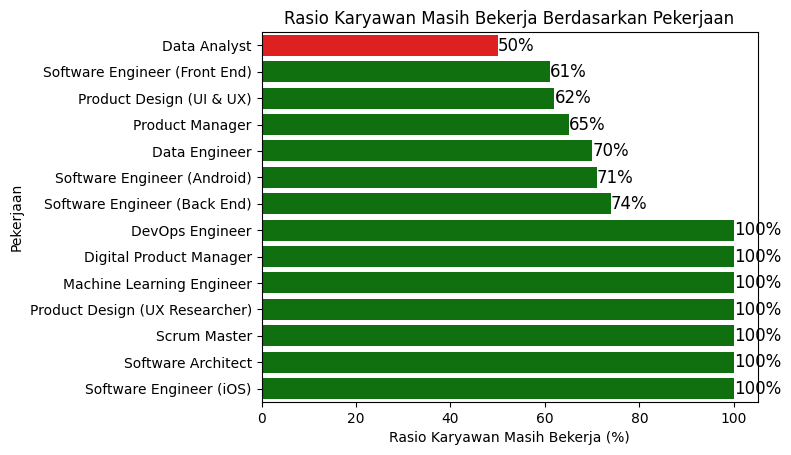

In [29]:
cols = ['red' if x <  60 else 'green' for x in df_reswork['Percent Karyawan Masih Bekerja(%)']]

ax = sns.barplot(data=df_reswork,
                 x='Percent Karyawan Masih Bekerja(%)',
                 y='Pekerjaan',
                 palette=cols,
                 order=df_reswork.sort_values('Percent Karyawan Masih Bekerja(%)').Pekerjaan)

plt.xlabel('Rasio Karyawan Masih Bekerja (%)')
plt.ylabel('Pekerjaan')
plt.title('Rasio Karyawan Masih Bekerja Berdasarkan Pekerjaan')

for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, '{:.0f}%'.format(width), ha="left", va="center", fontsize=12, color='black')

plt.show()

In [30]:
df_resign.columns

Index(['EnterpriseID', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian',
       'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah',
       'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'TingkatPendidikan', 'IkutProgramLOP',
       'AlasanResign', 'TanggalLahir', 'TanggalHiring',
       'TanggalPenilaianKaryawan', 'TanggalResign', 'Umur', 'TahunHiring',
       'TahunResign', 'MasaKerja', 'Resign'],
      dtype='object')

In [31]:
df_analyst=df_resign[df_resign['Pekerjaan']=='Data Analyst']
agg_analyst=df_analyst.groupby(['Pekerjaan','JenjangKarir','PerformancePegawai','AlasanResign'])['Resign'].count().reset_index()
agg_analyst

,Pekerjaan,JenjangKarir,PerformancePegawai,AlasanResign,Resign
0,Data Analyst,Freshgraduate_program,Bagus,toxic_culture,1
1,Data Analyst,Freshgraduate_program,Biasa,internal_conflict,1
2,Data Analyst,Freshgraduate_program,Biasa,toxic_culture,1
3,Data Analyst,Freshgraduate_program,Sangat_bagus,internal_conflict,1
4,Data Analyst,Freshgraduate_program,Sangat_bagus,toxic_culture,3
5,Data Analyst,Freshgraduate_program,Sangat_kurang,toxic_culture,1


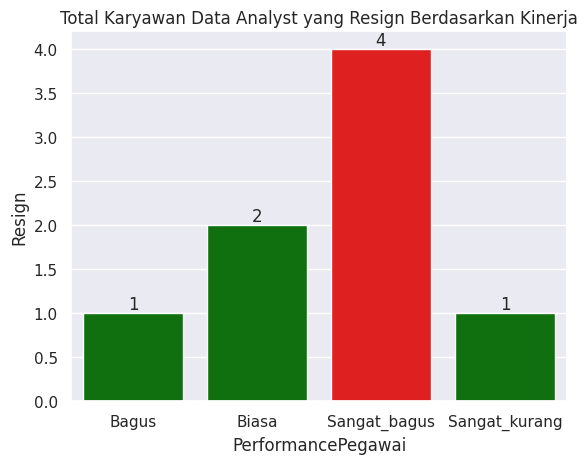

In [32]:
df_da = agg_analyst.groupby('PerformancePegawai').sum().reset_index()

cols = ['red' if x == 4 else 'green' for x in df_da['Resign']]

ax = sns.set_theme(style='darkgrid')
ax = sns.barplot(data=df_da,
            x='PerformancePegawai',
            y='Resign',
            palette = cols)
plt.title('Total Karyawan Data Analyst yang Resign Berdasarkan Kinerja', size=12)
ax.bar_label(ax.containers[0])
plt.show()

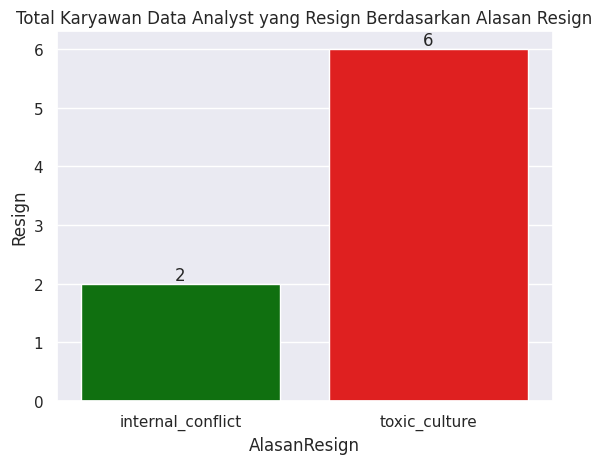

In [33]:
df_da = agg_analyst.groupby('AlasanResign').sum().reset_index()

cols = ['red' if x > 5 else 'green' for x in df_da['Resign']]

ax = sns.set_theme(style='darkgrid')
ax = sns.barplot(data=df_da,
            x='AlasanResign',
            y='Resign',
            palette = cols)
plt.title('Total Karyawan Data Analyst yang Resign Berdasarkan Alasan Resign', size=12)
ax.bar_label(ax.containers[0])
plt.show()

Most Data Analyst employees demonstrate excellent performance. However, despite the majority having outstanding performance, there are still 4 Data Analyst employees who have chosen to resign. The most common reason for resignation is a 'toxic culture,' with 6 individuals resigning due to issues related to an unhealthy work culture.

Recommendations:
- The company needs to conduct an evaluation of its corporate culture, identifying behaviors or policies that could create an unhealthy work environment.
- Provide open communication channels to discuss the issues employees are facing.
- Conduct interviews with resigning employees to gain a deeper understanding of their reasons for leaving.

##Build an Automated Resignation Behavior Prediction using Machine Learning

In [34]:
df_new=df.copy()
df_new.head()

,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,SkorSurveyEngagement,SkorKepuasanPegawai,...,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Umur,TahunHiring,TahunResign,MasaKerja,Resign
0,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,4,4,...,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,2023-11-12 18:49:23.671624,51,2011,Masih Bekerja,12,0
1,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,4,4,...,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16 00:00:00.000000,39,2014,2018,4,1
2,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,4,3,...,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24 00:00:00.000000,49,2011,2014,3,1
3,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,3,3,...,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,2023-11-12 18:49:23.671624,44,2014,Masih Bekerja,9,0
4,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,3,3,...,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06 00:00:00.000000,49,2013,2018,5,1


In [35]:
lst_item = []
for col in df_new.columns:
    dtypes = df_new[col].dtype
    n_null =  df_new[col].isnull().sum()
    percent_null = round(100*df_new[col].isnull().sum()/len(df_new[col]),2)
    n_unique = df_new[col].nunique()
    unique = df_new[col].unique()[:5]
    lst_item.append([col,dtypes, n_null,percent_null,n_unique,unique] )
df_new_desc = pd.DataFrame(data=lst_item, columns=['Feature', 'dtypes', 'n_null', 'percent_null', 'n_unique', 'unique'])
df_new_desc

,Feature,dtypes,n_null,percent_null,n_unique,unique
0,EnterpriseID,int64,0,0.0,287,"[111065, 106080, 106452, 106325, 111171]"
1,StatusPernikahan,object,0,0.0,4,"[Belum_menikah, Menikah, Bercerai, Lainnya]"
2,JenisKelamin,object,0,0.0,2,"[Pria, Wanita]"
3,StatusKepegawaian,object,0,0.0,3,"[Outsource, FullTime, Internship]"
4,Pekerjaan,object,0,0.0,14,"[Software Engineer (Back End), Data Analyst, S..."
5,JenjangKarir,object,0,0.0,3,"[Freshgraduate_program, Senior_level, Mid_level]"
6,PerformancePegawai,object,0,0.0,5,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
7,AsalDaerah,object,0,0.0,5,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
8,SkorSurveyEngagement,int64,0,0.0,5,"[4, 3, 2, 1, 5]"
9,SkorKepuasanPegawai,int64,0,0.0,5,"[4, 3, 5, 2, 1]"


In [36]:
df_new.shape

(287, 25)

In [37]:
df_new.duplicated().sum()

0

In [38]:
# Drop Unnecessary Features
df_new=df_new.drop(columns=['EnterpriseID','AsalDaerah','TanggalLahir','TanggalHiring','TanggalPenilaianKaryawan','TanggalResign','AlasanResign','TahunResign'])

In [39]:
# Label Encoding
mapping_sk = {
    'Outsource' : 0,
    'FullTime' : 1,
    'Internship' : 2}
df_new['StatusKepegawaian'] = df_new['StatusKepegawaian'].map(mapping_sk)

mapping_gender = {
    'Pria' : 0,
    'Wanita' : 1}
df_new['JenisKelamin'] = df_new['JenisKelamin'].map(mapping_gender)

mapping_karir = {
    'Freshgraduate_program' : 0,
    'Mid_level' : 1,
    'Senior_level' : 2}
df_new['JenjangKarir'] = df_new['JenjangKarir'].map(mapping_karir)

mapping_performance = {
    'Sangat_kurang' : 0,
    'Kurang' : 1,
    'Biasa' : 2,
    'Bagus' : 3,
    'Sangat_bagus' : 4}
df_new['PerformancePegawai'] = df_new['PerformancePegawai'].map(mapping_performance)

mapping_pend = {
    'Sarjana' : 0,
    'Magister' : 1,
    'Doktor' : 2}
df_new['TingkatPendidikan'] = df_new['TingkatPendidikan'].map(mapping_pend)

In [40]:
# One Hot Encoding
status = pd.get_dummies(df_new['StatusPernikahan'], prefix='StatusPernikahan')
pekerjaan = pd.get_dummies(df_new['Pekerjaan'], prefix='Divisi')

df_new = pd.concat([df_new,status,pekerjaan],axis=1)
df_new.drop(['StatusPernikahan','Pekerjaan'],axis=1,inplace=True)
df_new.head(2)

,JenisKelamin,StatusKepegawaian,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,...,Divisi_Machine Learning Engineer,Divisi_Product Design (UI & UX),Divisi_Product Design (UX Researcher),Divisi_Product Manager,Divisi_Scrum Master,Divisi_Software Architect,Divisi_Software Engineer (Android),Divisi_Software Engineer (Back End),Divisi_Software Engineer (Front End),Divisi_Software Engineer (iOS)
0,0,0,0,4,4,4,0,0,9,1,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,4,4,4,0,3,0,...,0,0,0,0,0,0,0,0,0,0


Number of rows before filtering outliers: 287
Number of rows after filtering outliers: 284


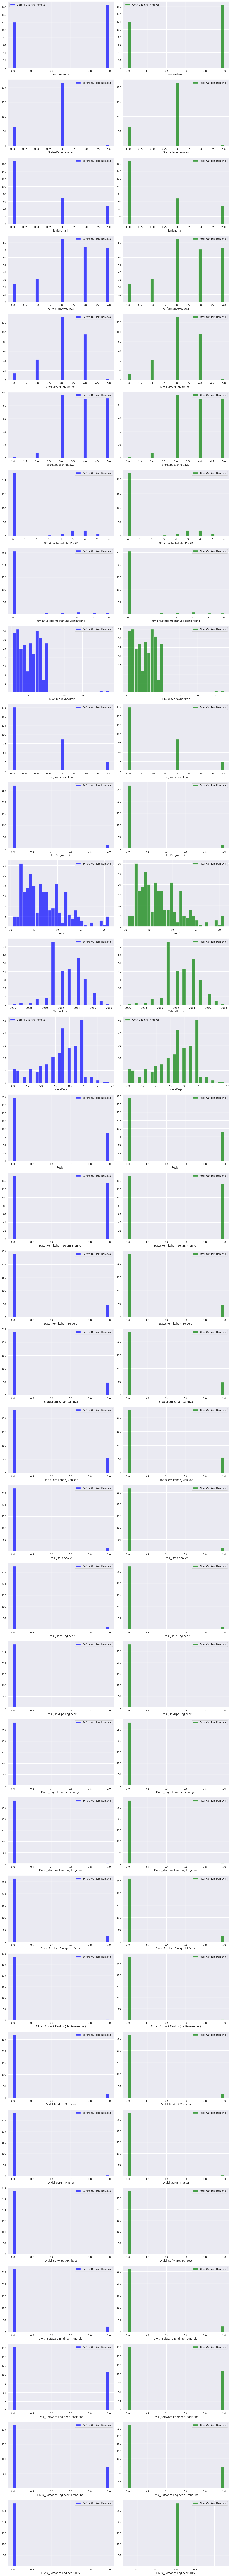

In [41]:
df_original = df_new.copy()

# Handling Outliers
print(f'Number of rows before filtering outliers: {len(df_original)}')
num = df_new.select_dtypes(include=['int64', 'uint8']).columns.tolist()
filter = np.array([True] * len(df_new))
for col in num:
    Q1 = df_new[col].quantile(0.25)
    Q3 = df_new[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    filter = ((df_new[col] >= low_limit) & (df_new[col] <= high_limit))

df_new = df_new[filter].reset_index()
print('Number of rows after filtering outliers:', len(df_new))

num_cols = len(df_new.columns)

plt.figure(figsize=(15, 5 * num_cols))

for i, col in enumerate(df_original.columns):
    plt.subplot(num_cols, 2, 2 * i + 1)
    plt.hist(df_original[col], bins=30, color='blue', alpha=0.7, label='Before Outliers Removal')
    plt.legend()
    plt.xlabel(col)

    plt.subplot(num_cols, 2, 2 * i + 2)
    plt.hist(df_new[col], bins=30, color='green', alpha=0.7, label='After Outliers Removal')
    plt.legend()
    plt.xlabel(col)

plt.tight_layout()
plt.show()

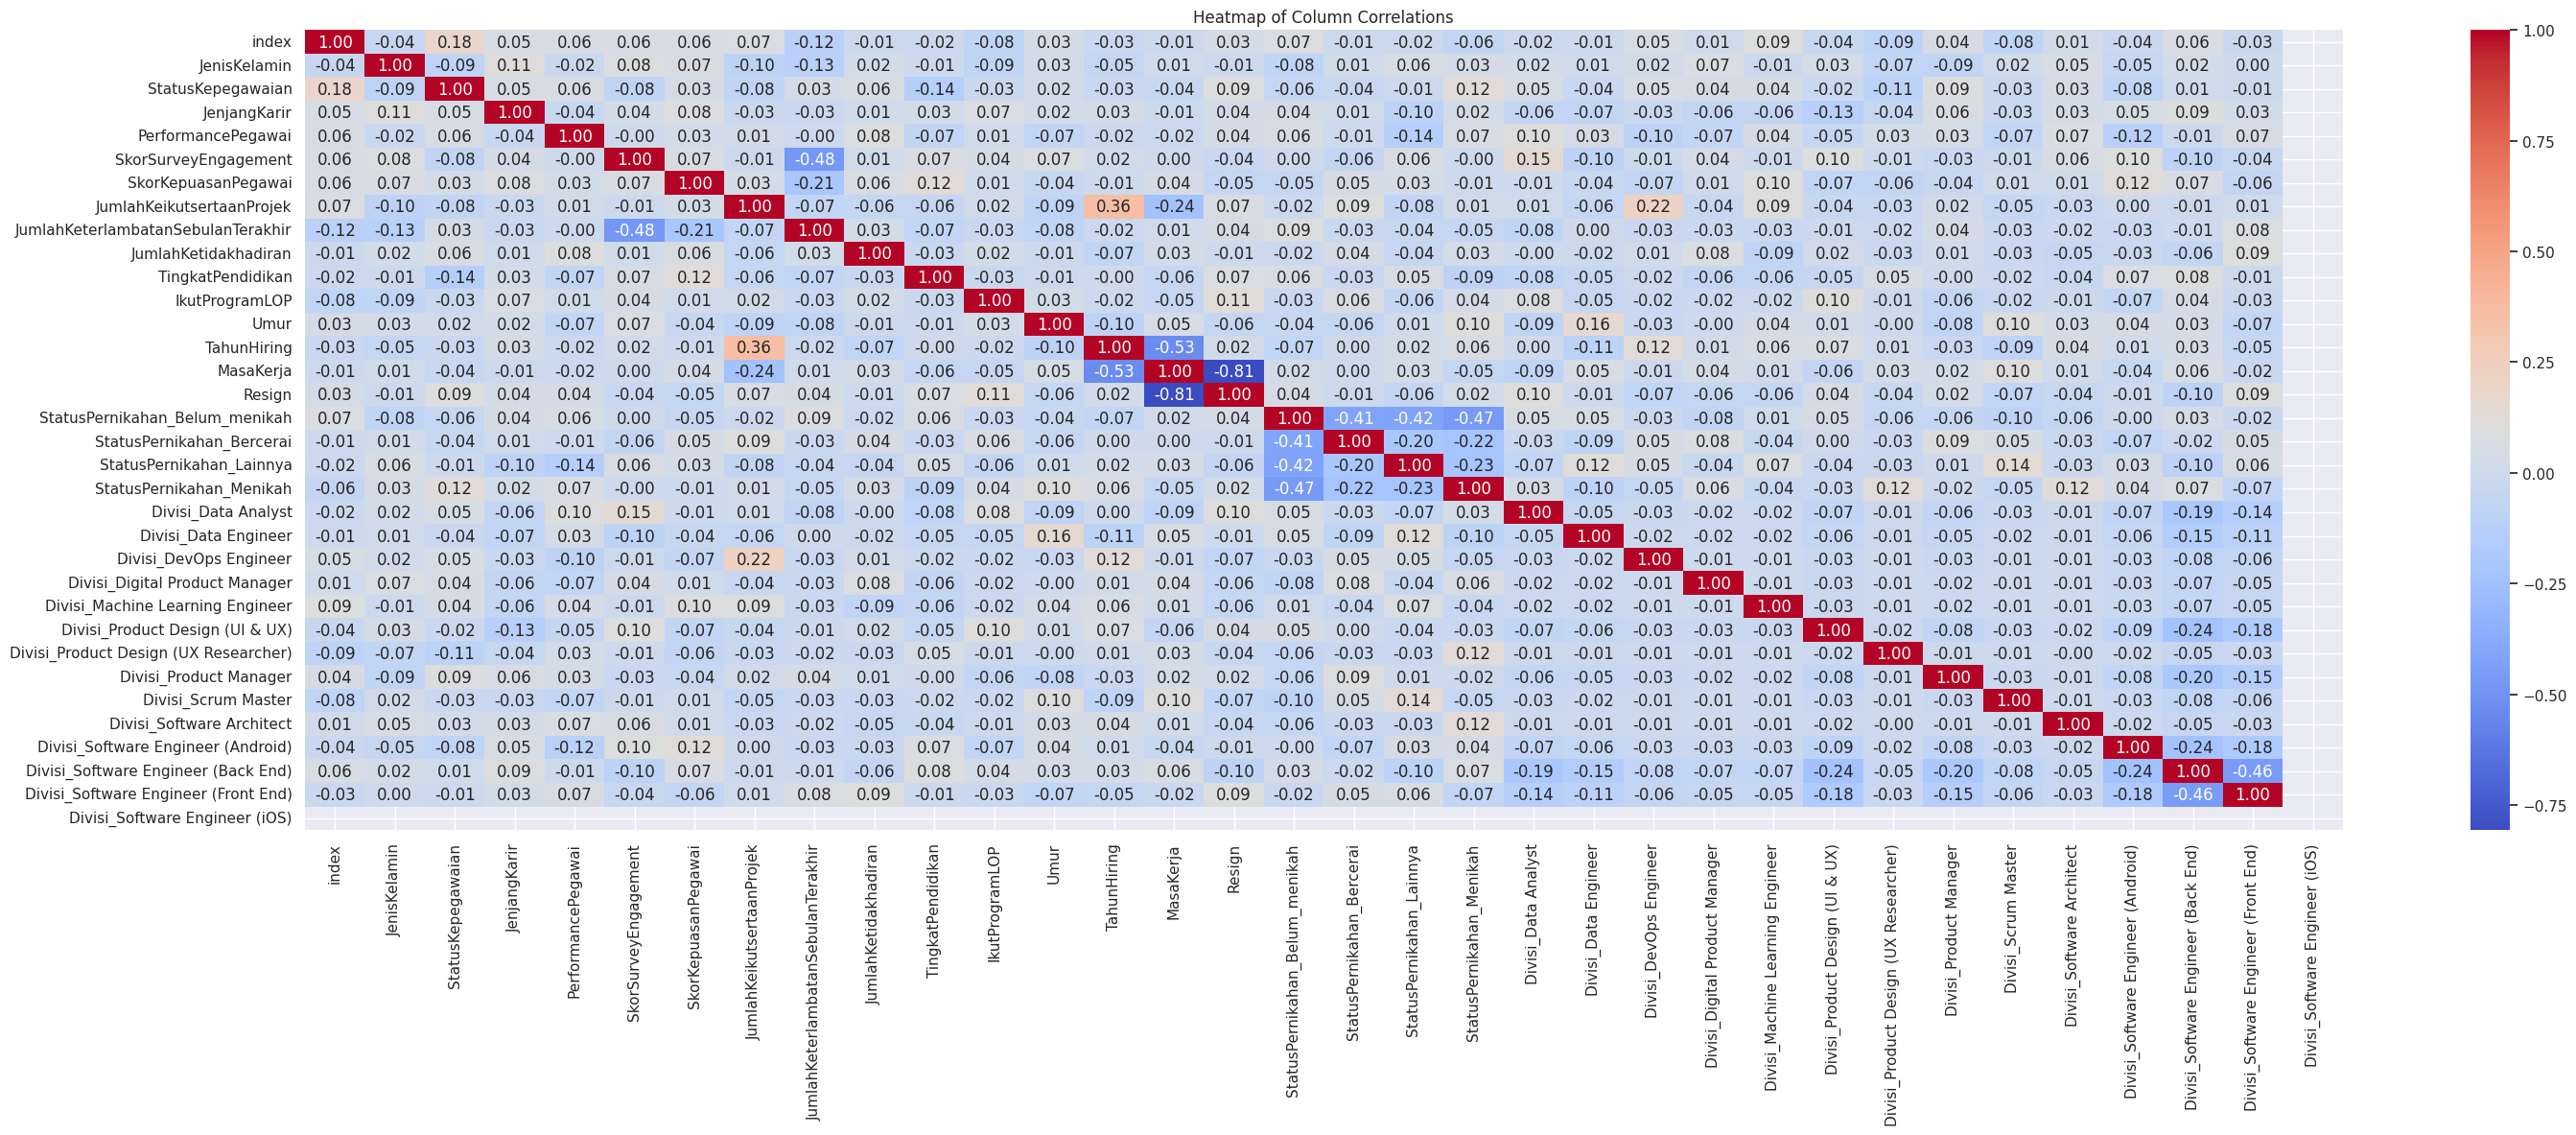

In [42]:
plt.figure(figsize=(30, 12))
sns.heatmap(df_new.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap of Column Correlations')
plt.tight_layout()
plt.show()

In [43]:
# Feature Selection
features = ['Resign', 'StatusKepegawaian', 'JenjangKarir', 'PerformancePegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'TingkatPendidikan', 'IkutProgramLOP', 'TahunHiring', 'StatusPernikahan_Belum_menikah', 'StatusPernikahan_Menikah', 'Divisi_Data Analyst', 'Divisi_Product Design (UI & UX)', 'Divisi_Product Manager', 'Divisi_Software Engineer (Front End)']

df_final = df_new[features]

In [44]:
# Feature Scaling
def standardize(data):
  for col in data[unstandardized_ft] :
    data[col] = StandardScaler().fit_transform(data[[col]])

unstandardized_ft = ['PerformancePegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'TahunHiring']
standardize(df_final)

In [45]:
#Split data to handle imbalance
X = df_final.drop('Resign', axis=1)
y = df_final['Resign']

#Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the training dataset is 227
The number of records in the test dataset is 57


In [46]:
# Handling Imbalanced Dataset
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Check data proportions
total_train = len(y_train)
prop_not_resigned, prop_resigned = (y_train.value_counts()[0] / total_train) * 100, (y_train.value_counts()[1] / total_train) * 100
print(f'Proportion of Not Resigned (0) in train set after oversampling: {prop_not_resigned:.2f}%')
print(f'Proportion of Resigned (1) in train set after oversampling: {prop_resigned:.2f}%')

total_ros = len(y_train_ros)
prop_not_resigned_ros, prop_resigned_ros = (y_train_ros.value_counts()[0] / total_ros) * 100, (y_train_ros.value_counts()[1] / total_ros) * 100
print(f'Proportion of Not Resigned (0) in train set after oversampling: {prop_not_resigned_ros:.2f}%')
print(f'Proportion of Resigned (1) in train set after oversampling: {prop_resigned_ros:.2f}%')

Proportion of Not Resigned (0) in train set after oversampling: 67.84%
Proportion of Resigned (1) in train set after oversampling: 32.16%
Proportion of Not Resigned (0) in train set after oversampling: 50.00%
Proportion of Resigned (1) in train set after oversampling: 50.00%


In [47]:
# Data Modeling
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
xg = XGBClassifier()

models = [logreg, dt, rf, knn, gbc, xg]

modeling = []
accuracy = []
precision = []
recall = []
f1_score = []
auc = []

# Loop through models and perform cross-validation with RandomOverSampler and SMOTE
for model in models:
    print("Model:", model.__class__.__name__)

    ros = RandomOverSampler(random_state=42)

    pipeline = Pipeline(steps=[("r", ros), ("m", model)])

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']

    scores = cross_validate(pipeline,
                            X_train_ros,
                            y_train_ros,
                            scoring=scoring,
                            cv=cv,
                            n_jobs=-1)

    modeling.append(model.__class__.__name__)
    accuracy.append(np.mean(scores['test_accuracy']))
    precision.append(np.mean(scores['test_precision_macro']))
    recall.append(np.mean(scores['test_recall_macro']))
    f1_score.append(np.mean(scores['test_f1_macro']))
    auc.append(np.mean(scores['test_roc_auc']))

df_model = pd.DataFrame({'Model': modeling,
                         'Accuracy': accuracy,
                         'Precision': precision,
                         'Recall': recall,
                         'F1_score': f1_score,
                         'AUC': auc})
df_model.sort_values(by='AUC', ascending=False)

Model: LogisticRegression
Model: DecisionTreeClassifier
Model: RandomForestClassifier
Model: KNeighborsClassifier
Model: GradientBoostingClassifier
Model: XGBClassifier


,Model,Accuracy,Precision,Recall,F1_score,AUC
2,RandomForestClassifier,0.812832,0.827300,0.812847,0.810473,0.898009
5,XGBClassifier,0.783620,0.804271,0.784167,0.779247,0.855250
1,DecisionTreeClassifier,0.801864,0.818898,0.802222,0.798904,0.803796
4,GradientBoostingClassifier,0.714409,0.718133,0.714306,0.712473,0.779120
3,KNeighborsClassifier,0.647097,0.650103,0.647153,0.644822,0.678620
0,LogisticRegression,0.644014,0.647997,0.644306,0.641898,0.671796


Based on the results, the RandomForestClassifier model demonstrates excellent performance in predicting employee attrition, with high values as follows:
- Accuracy: 81.28% – the model accurately predicts more than 80% of cases where employees stay or leave the company.
- Precision: The model has the ability to identify 82.73% of predicted attrition cases that actually exit the company.
- AUC (Area Under the ROC Curve): 89.80% – the model exhibits excellent capability in distinguishing between employees who stay and those who leave the company

Model: RandomForestClassifier
Best Parameters:  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
Best AUC Score:  0.9125320846340618
Best Estimator: RandomForestClassifier(max_depth=20, max_features='auto', n_estimators=500,
                       random_state=42)


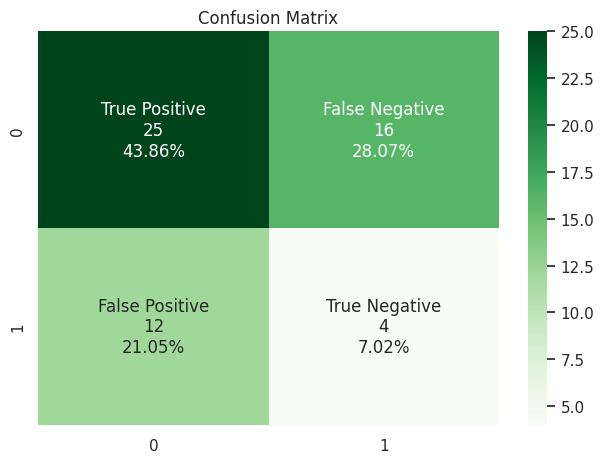

Feature Importance:
                                 Feature  Importance
7                            TahunHiring    0.193718
2                     PerformancePegawai    0.149053
1                           JenjangKarir    0.095694
5                      TingkatPendidikan    0.092185
3              JumlahKeikutsertaanProjek    0.078340
0                      StatusKepegawaian    0.058236
13  Divisi_Software Engineer (Front End)    0.056264
8         StatusPernikahan_Belum_menikah    0.050832
4     JumlahKeterlambatanSebulanTerakhir    0.048031
6                         IkutProgramLOP    0.038886
9               StatusPernikahan_Menikah    0.038493
11       Divisi_Product Design (UI & UX)    0.038092
10                   Divisi_Data Analyst    0.037087
12                Divisi_Product Manager    0.025089


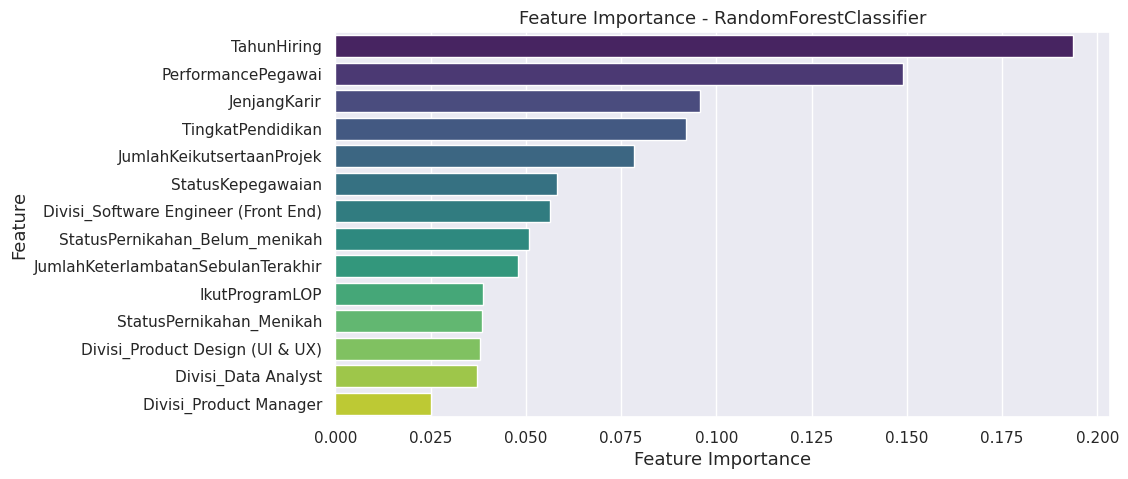

                    Model  Accuracy  Precision    Recall  F1_score       AUC
0  RandomForestClassifier  0.811756   0.825916  0.811944   0.80953  0.904278


In [48]:
def evaluate_random_forest(X, y, X_test, y_test):
    print("Model: RandomForestClassifier")

    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # Hyperparameter Tuning
    param_dist = {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 6],
        'max_features': ['auto', 'sqrt', 'log2', None]
    }
    rf = RandomForestClassifier(random_state=42)
    rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, scoring='roc_auc', cv=5, n_jobs=-1)
    rf_random.fit(X_resampled, y_resampled)

    print("Best Parameters: ", rf_random.best_params_)
    print("Best AUC Score: ", rf_random.best_score_)
    print("Best Estimator:", rf_random.best_estimator_)

    # Model Evaluation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']

    scores = cross_validate(rf_random.best_estimator_, X_resampled, y_resampled, scoring=scoring, cv=cv, n_jobs=-1)

    model_results = {
        'Model': 'RandomForestClassifier',
        'Accuracy': np.mean(scores['test_accuracy']),
        'Precision': np.mean(scores['test_precision_macro']),
        'Recall': np.mean(scores['test_recall_macro']),
        'F1_score': np.mean(scores['test_f1_macro']),
        'AUC': np.mean(scores['test_roc_auc'])}

    # Confusion Matrix
    y_pred = rf_random.best_estimator_.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_pcts = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_pcts)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')
    plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

    # Feature Importance
    best_rf = rf_random.best_estimator_
    feature_importances = best_rf.feature_importances_

    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("Feature Importance:")
    print(feature_importance_df)

    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(25), palette='viridis')
    plt.xlabel('Feature Importance', fontsize=13)
    plt.ylabel('Feature', fontsize=13)
    plt.title('Feature Importance - RandomForestClassifier', fontsize=13)
    plt.show()

    return model_results

# Assuming you have defined your features (X_train_ros, X_test) and target variables (y_train_ros, y_test)
results_rf = evaluate_random_forest(X_train_ros, y_train_ros, X_test, y_test)

df_model_rf = pd.DataFrame([results_rf])
print(df_model_rf)